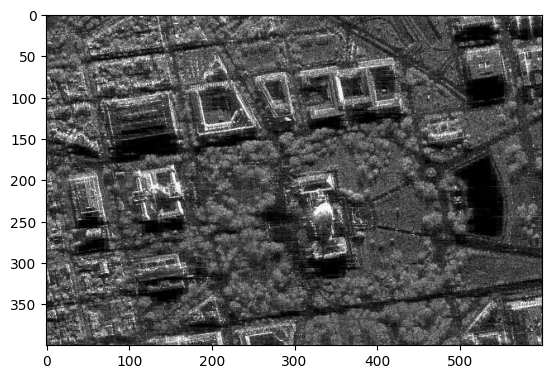

In [16]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
# 1. Загрузка изображения в оттенках серого
image = cv2.imread('sar_1_gray.jpg')

image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(image_gray, cmap="gray")
plt.show()

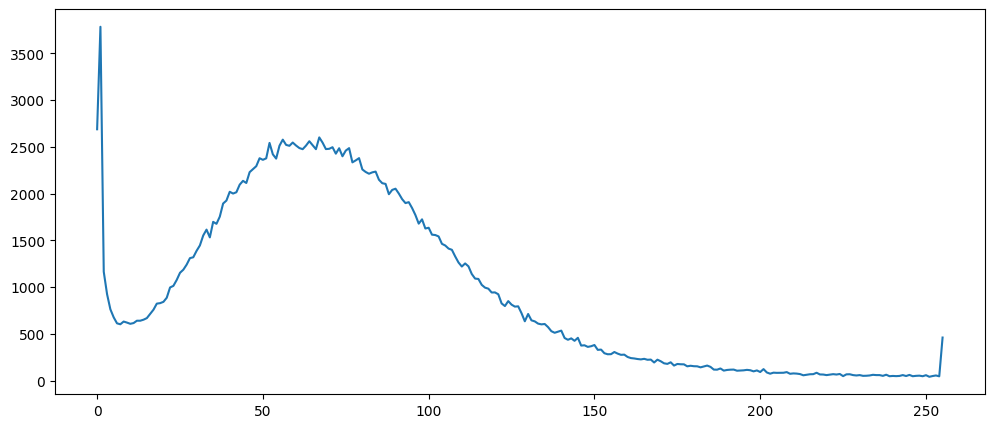

In [4]:
# 2. Построение гистограммы
plt.figure(figsize=(16, 8))
histSize = 256
histRange = (0, 256)
accumulate = False
hist = cv2.calcHist([image_gray], [0], None, [histSize], histRange, accumulate=accumulate)
plt.plot(hist)

plt.show()

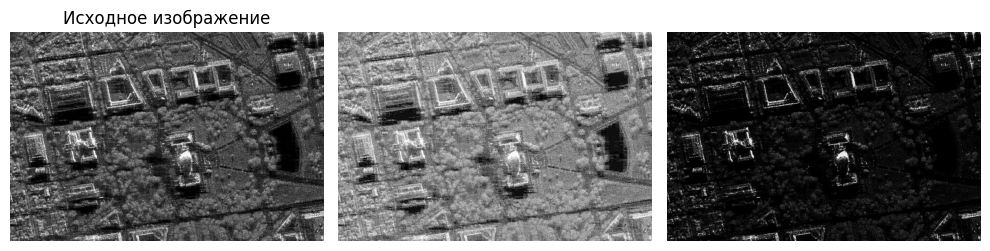

In [34]:
# 3. реализуйте алгоритм гамма коррекции с параметром гамма <1, >1.
def gamma_correction(image, gamma=1.0):
    # Нормализуем изображение и применяем гамма-коррекцию
    image_normalized = image / 255.0
    gamma_corrected = np.power(image_normalized, gamma)
    return np.uint8(gamma_corrected * 255)
# Применяем гамма-коррекцию с разными параметрами
gamma_05 = gamma_correction(image_gray, 0.5)  # gamma < 1
gamma_25 = gamma_correction(image_gray, 2.5)  # gamma > 1
# Гистограммы для гамма-коррекции
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(image_gray, cmap='gray')
plt.title('Исходное изображение')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(gamma_05, cmap='gray')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(gamma_25, cmap='gray')
plt.axis('off')
plt.tight_layout()
plt.show()



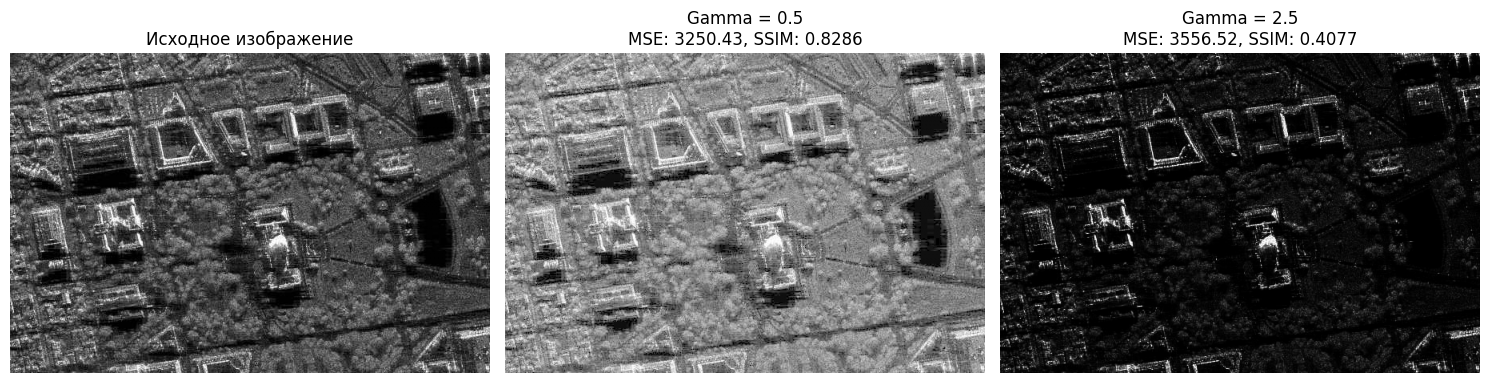

In [42]:
# 4. Сравнение изображений
# MSE - среднеквадратичная ошибка, измеряет среднюю величину ошибки между пикселями
# SSIM - индекс структурного сходства, измеряет воспринимаемое качество и структурное сходство
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(image_gray, cmap='gray')
plt.title('Исходное изображение')
plt.axis('off')

# Гамма = 0.5
plt.subplot(1, 3, 2)
plt.imshow(gamma_05, cmap='gray')

# MSE и SSIM
mse_05 = mean_squared_error(image_gray, gamma_05)
ssim_05 = structural_similarity(image_gray, gamma_05)

plt.title(f'Gamma = 0.5\nMSE: {mse_05:.2f}, SSIM: {ssim_05:.4f}')
plt.axis('off')

# Гамма = 2.5
plt.subplot(1, 3, 3)
plt.imshow(gamma_25, cmap='gray')

# MSE и SSIM
mse_25 = mean_squared_error(image_gray, gamma_25)
ssim_25 = structural_similarity(image_gray, gamma_25)

plt.title(f'Gamma = 2.5\nMSE: {mse_25:.2f}, SSIM: {ssim_25:.4f}')
plt.axis('off')

plt.tight_layout()
plt.show()

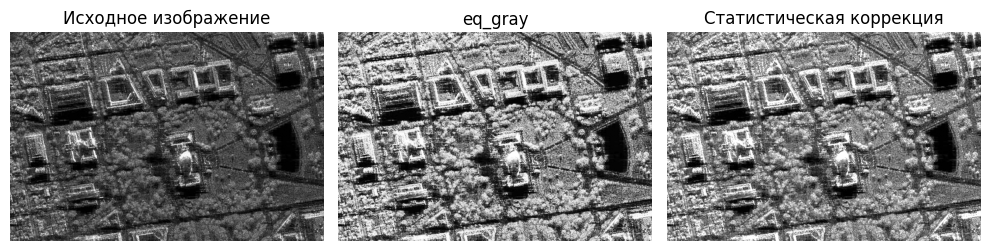

Сравнение статистической коррекции:
MSE: 2946.7009
SSIM: 0.7991



In [43]:
# 5. реализуйте алгоритм статистической цветокоррекции на основе статистики eq_gray.
eq_gray = cv2.equalizeHist(image_gray)
def statistical_correction(image, reference_image):
    current_mean = np.mean(image)  # средняя яркость всех пикселей
    current_std = np.std(image)  # мера контрастности
    ref_mean = np.mean(reference_image)
    ref_std = np.std(reference_image)
    corrected = (image - current_mean) * (ref_std / current_std) + ref_mean
    corrected = np.clip(corrected, 0, 255)
    return corrected.astype(np.uint8)
image_stat_corrected = statistical_correction(image_gray, eq_gray)
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(image_gray, cmap='gray')
plt.title('Исходное изображение')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(eq_gray, cmap='gray')
plt.title('eq_gray')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(image_stat_corrected, cmap='gray')
plt.title('Статистическая коррекция')
plt.axis('off')
plt.tight_layout()
plt.show()
# Сравнение статистической коррекции
mse_stat = mean_squared_error(image_gray, image_stat_corrected)
ssim_stat = structural_similarity(image_gray, image_stat_corrected)
print("Сравнение статистической коррекции:")
print(f"MSE: {mse_stat:.4f}")
print(f"SSIM: {ssim_stat:.4f}")
print()


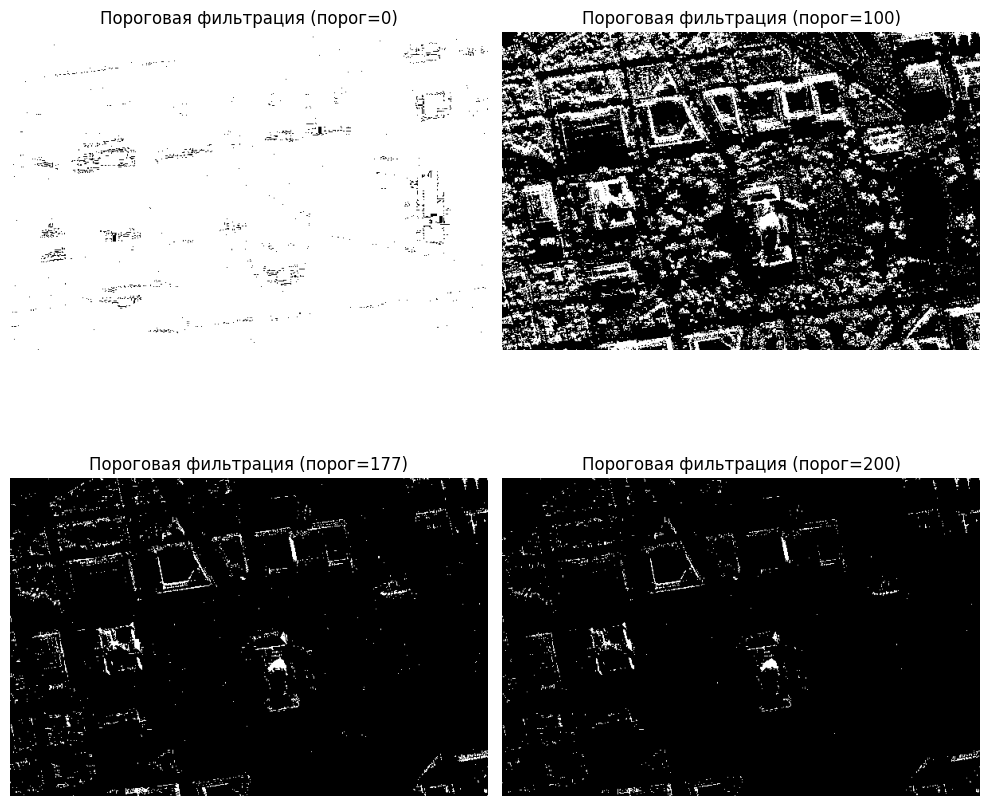

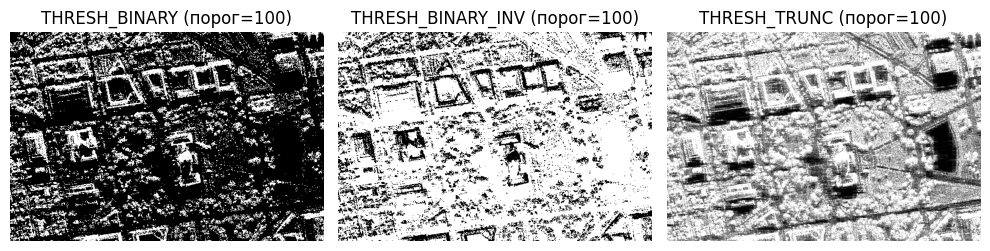

In [45]:
# 6. Пороговая фильтрация
thresholds = [0, 100, 177, 200]

plt.figure(figsize=(10, 10))

for i, threshold_value in enumerate(thresholds):
    _, thresh1 = cv2.threshold(image_gray, threshold_value, 255, cv2.THRESH_BINARY)

    plt.subplot(2, 2, i + 1)
    plt.imshow(thresh1, cmap='gray')
    plt.title(f'Пороговая фильтрация (порог={threshold_value})')
    plt.axis('off')

plt.tight_layout()
plt.show()

test_threshold = 100

methods = [
    ('THRESH_BINARY', cv2.THRESH_BINARY),
    ('THRESH_BINARY_INV', cv2.THRESH_BINARY_INV),
    ('THRESH_TRUNC', cv2.THRESH_TRUNC),
]

plt.figure(figsize=(10, 5))

for i, (method_name, method_type) in enumerate(methods):
    _, result = cv2.threshold(image_gray, test_threshold, 255, method_type)

    plt.subplot(1, 3, i + 1)
    plt.imshow(result, cmap='gray')
    plt.title(f'{method_name} (порог={test_threshold})')
    plt.axis('off')

plt.tight_layout()
plt.show()
